In [12]:
import torch
from utils import LQR_2D_true_solution, out_put, LQR_1D_true_solution, l_2_compute_1D_Q, l_2_compute_1D_V, true_V_eval_2D
from bases import bases_poly, d_bases_poly, sec_bases_poly, bases_2d, bases_poly_simp, d_bases_poly_simp, sec_bases_poly_simp, bases_2d_simp, bases_poly_2D, bases_poly_2D_s_a, d_bases_poly_2D, bases_poly_2D_simp, d_bases_poly_2D_simp, sec_d_bases_poly_2D, sec_d_bases_poly_2D_simp
from main_phibe import phibe_finder_1D_LQR, phibe_finder_2D_LQR
from main_RL import RL_finder_1D_LQR, RL_finder_2D_LQR
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np

In [13]:
torch.set_default_dtype(torch.float64)
device = torch.device("cpu")

In [14]:
def reward(s, a):
    return - Q * (s**2) - R * (a**2)

In [15]:
A = 1
B = 1
sig = 0.
R = 1
Q = 1
S = 0
beta = 0
M = 2
info_true = {"A":A, "B":B, "sig":sig, "R":R, "Q":Q,}
true_b, True_V = LQR_1D_true_solution(A, B, Q, R, sig, beta)
print(true_b, True_V)

-2.414213562373095 tensor([ 0.0000,  0.0000, -2.4142])


In [16]:
b_init = - 1.2
Q_init = torch.tensor([1., -1., -1., -1.]).to(device)
batch_size = int(1e6)
bd_low_s = -3
bd_upper_s = 3.
bd_low_b = -3.
bd_upper_b = 3.
bd_low_a = -3.
bd_upper_a = 3
bases_V = bases_poly_simp
d_bases_V = d_bases_poly_simp
sec_d_bases_V = sec_bases_poly_simp
bases_Q = bases_2d_simp
num_iter = 80
GD_num_iter = 80
I = 6
m = int(batch_size / I)
m_Q = int(batch_size / I)
lr = 0.01
dt = 2
order = 1
true_V = True_V
simp_basis = True
deterministic = True
b_val_phibe_1, V_exact_dist_phibe_1, V_func_phibe_1 = phibe_finder_1D_LQR(beta, b_init, Q_init, bd_low_s, bd_upper_s, bd_low_b, bd_upper_b, reward, simp_basis,
                                                                                     bases_V, d_bases_V, sec_d_bases_V, bases_Q, num_iter, deterministic, "Galerkin", GD_num_iter, m, m_Q, I, lr, dt, order, 
                                                                                     true_V, info_true)

Running Optimal Phibe of order 1 using Galerkin: 100%|██████████| 80/80 [00:03<00:00, 26.20it/s]


In [17]:
b_init = - 1.2
Q_init = torch.tensor([1., -1., -1., -1.]).to(device)
batch_size = int(1e6)
bd_low_s = -3
bd_upper_s = 3.
bd_low_b = -3.
bd_upper_b = 3.
bd_low_a = -3.
bd_upper_a = 3
bases_V = bases_poly_simp
d_bases_V = d_bases_poly_simp
sec_d_bases_V = sec_bases_poly_simp
bases_Q = bases_2d_simp
num_iter = 80
GD_num_iter = 80
I = 6
m = int(batch_size / I)
m_Q = int(batch_size / I)
lr = 0.01
dt = 2
order = 2
true_V = True_V
simp_basis = True
deterministic = True
b_val_phibe_2, V_exact_dist_phibe_2, V_func_phibe_2 = phibe_finder_1D_LQR(beta, b_init, Q_init, bd_low_s, bd_upper_s, bd_low_b, bd_upper_b, reward, simp_basis,
                                                                                     bases_V, d_bases_V, sec_d_bases_V, bases_Q, num_iter, deterministic, "Galerkin", GD_num_iter, m, m_Q, I, lr, dt, order, 
                                                                                     true_V, info_true)

Running Optimal Phibe of order 2 using Galerkin: 100%|██████████| 80/80 [00:02<00:00, 35.95it/s]


In [18]:
b_init = - 1.2
Q_init = torch.tensor([1., -1., -1., -1.]).to(device)
batch_size = int(1e6)
bd_low_s = -3
bd_upper_s = 3.
bd_low_b = -3.
bd_upper_b = 3.
bd_low_a = -3.
bd_upper_a = 3
bases_Q = bases_2d_simp
num_iter = 80
GD_num_iter = 80
I = 6
m_Q = int(batch_size / I)
dt = 2
order = 1
true_V = True_V
simple_basis = True
b_val_RL, V_exact_dist_RL = RL_finder_1D_LQR(beta, b_init, bd_low_s, bd_upper_s, bd_low_a, bd_upper_a, reward, simple_basis, bases_Q, num_iter, m_Q, I, dt, true_V, info_true)

Running RL method: 100%|██████████| 80/80 [00:02<00:00, 29.40it/s]


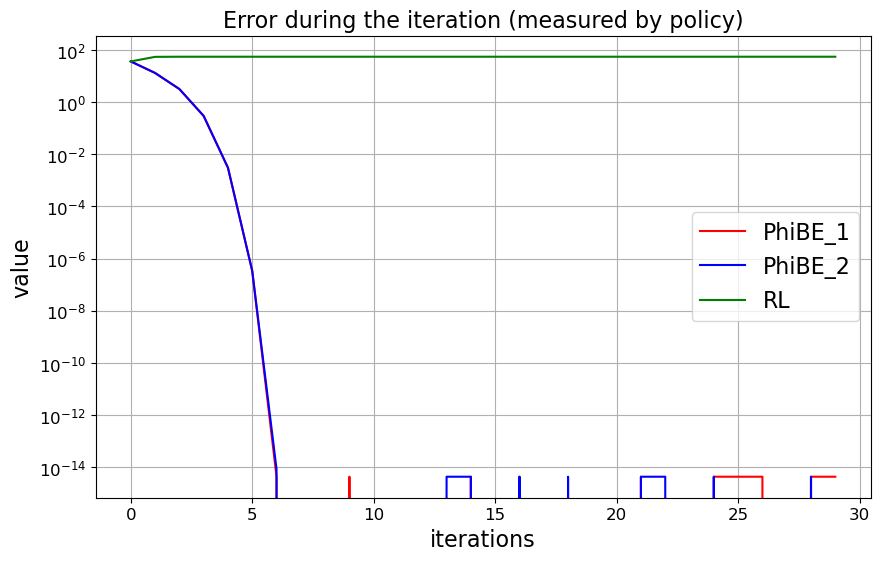

In [19]:
x_tensor = torch.arange(30)
w_tensor = torch.tensor(V_exact_dist_phibe_1[:30], dtype=torch.float64)
y_tensor = torch.tensor(V_exact_dist_phibe_2[:30], dtype=torch.float64)
v_tensor = torch.tensor(V_exact_dist_RL[:30], dtype=torch.float64)
x_values = x_tensor.numpy()
w_values = w_tensor.numpy()
y_values = y_tensor.numpy()
v_values = v_tensor.numpy()
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=12)  # Adjust 12 as needed
plt.yticks(fontsize=12)
plt.semilogy(x_values, w_values, label='PhiBE_1', color='red')
plt.semilogy(x_values, y_values, label='PhiBE_2', color='blue')
plt.semilogy(x_values, v_values, label='RL', color='green')
plt.title('Error during the iteration (measured by policy)', fontsize=16)
plt.xlabel('iterations', fontsize=16)
plt.ylabel('value', fontsize=16)
plt.grid(True)
plt.legend(fontsize=16)
plt.show()

In [21]:
A = 1
B = 0.1
sig = 0.
R = 1
Q = 1
S = 0
beta = 0
M = 2
info_true = {"A":A, "B":B, "sig":sig, "R":R, "Q":Q,}
true_b, True_V = LQR_1D_true_solution(A, B, Q, R, sig, beta)
print(true_b, True_V)

-20.04987562112089 tensor([   0.0000,    0.0000, -200.4988])


In [22]:
b_init = - 10.1
Q_init = torch.tensor([1., -1., -1., -1.]).to(device)
batch_size = int(1e6)
bd_low_s = -30
bd_upper_s = 30.
bd_low_b = -30.
bd_upper_b = 30.
bd_low_a = -30.
bd_upper_a = 30
bases_V = bases_poly_simp
d_bases_V = d_bases_poly_simp
sec_d_bases_V = sec_bases_poly_simp
bases_Q = bases_2d_simp
num_iter = 80
GD_num_iter = 80
I = 6
m = int(batch_size / I)
m_Q = int(batch_size / I)
lr = 0.01
dt = 1
order = 1
true_V = True_V
simp_basis = True
deterministic = True
b_val_phibe_1, V_exact_dist_phibe_1, V_func_phibe_1 = phibe_finder_1D_LQR(beta, b_init, Q_init, bd_low_s, bd_upper_s, bd_low_b, bd_upper_b, reward, simp_basis,
                                                                                     bases_V, d_bases_V, sec_d_bases_V, bases_Q, num_iter, deterministic, "Galerkin", GD_num_iter, m, m_Q, I, lr, dt, order, 
                                                                                     true_V, info_true)

Running Optimal Phibe of order 1 using Galerkin: 100%|██████████| 80/80 [00:03<00:00, 26.63it/s]


In [23]:
b_init = - 10.1
Q_init = torch.tensor([1., -1., -1., -1.]).to(device)
batch_size = int(1e6)
bd_low_s = -30
bd_upper_s = 30.
bd_low_b = -30.
bd_upper_b = 30.
bd_low_a = -30.
bd_upper_a = 30
bases_V = bases_poly_simp
d_bases_V = d_bases_poly_simp
sec_d_bases_V = sec_bases_poly_simp
bases_Q = bases_2d_simp
num_iter = 80
GD_num_iter = 80
I = 6
m = int(batch_size / I)
m_Q = int(batch_size / I)
lr = 0.01
dt = 1
order = 2
true_V = True_V
simp_basis = True
deterministic = True
b_val_phibe_2, V_exact_dist_phibe_2, V_func_phibe_2 = phibe_finder_1D_LQR(beta, b_init, Q_init, bd_low_s, bd_upper_s, bd_low_b, bd_upper_b, reward, simp_basis,
                                                                                     bases_V, d_bases_V, sec_d_bases_V, bases_Q, num_iter, deterministic, "Galerkin", GD_num_iter, m, m_Q, I, lr, dt, order, 
                                                                                     true_V, info_true)

Running Optimal Phibe of order 2 using Galerkin: 100%|██████████| 80/80 [00:02<00:00, 34.59it/s]


In [24]:
b_init = - 10.1
Q_init = torch.tensor([1., -1., -1., -1.]).to(device)
batch_size = int(1e6)
bd_low_s = -30
bd_upper_s = 30.
bd_low_b = -30.
bd_upper_b = 30.
bd_low_a = -30.
bd_upper_a = 30
bases_Q = bases_2d_simp
num_iter = 80
GD_num_iter = 80
I = 6
m_Q = int(batch_size / I)
dt = 1
order = 1
true_V = True_V
simple_basis = True
b_val_RL, V_exact_dist_RL = RL_finder_1D_LQR(beta, b_init, bd_low_s, bd_upper_s, bd_low_a, bd_upper_a, reward, simple_basis, bases_Q, num_iter, m_Q, I, dt, true_V, info_true)

Running RL method: 100%|██████████| 80/80 [00:02<00:00, 28.17it/s]


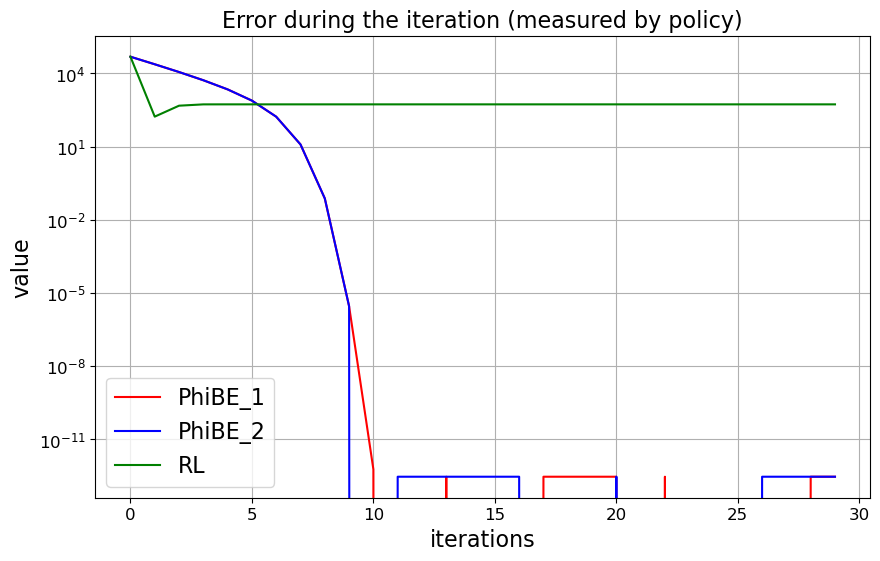

In [25]:
x_tensor = torch.arange(30)
w_tensor = torch.tensor(V_exact_dist_phibe_1[:30], dtype=torch.float64)
y_tensor = torch.tensor(V_exact_dist_phibe_2[:30], dtype=torch.float64)
v_tensor = torch.tensor(V_exact_dist_RL[:30], dtype=torch.float64)
x_values = x_tensor.numpy()
w_values = w_tensor.numpy()
y_values = y_tensor.numpy()
v_values = v_tensor.numpy()
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=12)  # Adjust 12 as needed
plt.yticks(fontsize=12)
plt.semilogy(x_values, w_values, label='PhiBE_1', color='red')
plt.semilogy(x_values, y_values, label='PhiBE_2', color='blue')
plt.semilogy(x_values, v_values, label='RL', color='green')
plt.title('Error during the iteration (measured by policy)', fontsize=16)
plt.xlabel('iterations', fontsize=16)
plt.ylabel('value', fontsize=16)
plt.grid(True)
plt.legend(fontsize=16)
plt.show()

In [26]:
A = 1
B = 1
sig = 0.
R = 0.01
Q = 100
S = 0
beta = 0
M = 2
info_true = {"A":A, "B":B, "sig":sig, "R":R, "Q":Q,}
true_b, True_V = LQR_1D_true_solution(A, B, Q, R, sig, beta)
print(true_b, True_V)

-101.00499987500623 tensor([ 0.0000,  0.0000, -1.0100])


In [28]:
b_init = - 20
Q_init = torch.tensor([1., -1., -1., -1.]).to(device)
batch_size = int(1e6)
bd_low_s = -300
bd_upper_s = 300.
bd_low_b = -300.
bd_upper_b = 300.
bd_low_a = -300.
bd_upper_a = 300
bases_V = bases_poly_simp
d_bases_V = d_bases_poly_simp
sec_d_bases_V = sec_bases_poly_simp
bases_Q = bases_2d_simp
num_iter = 80
GD_num_iter = 80
I = 6
m = int(batch_size / I)
m_Q = int(batch_size / I)
lr = 0.01
dt = 0.1
order = 1
true_V = True_V
simp_basis = True
deterministic = True
b_val_phibe_1, V_exact_dist_phibe_1, V_func_phibe_1 = phibe_finder_1D_LQR(beta, b_init, Q_init, bd_low_s, bd_upper_s, bd_low_b, bd_upper_b, reward, simp_basis,
                                                                                     bases_V, d_bases_V, sec_d_bases_V, bases_Q, num_iter, deterministic, "Galerkin", GD_num_iter, m, m_Q, I, lr, dt, order, 
                                                                                     true_V, info_true)

Running Optimal Phibe of order 1 using Galerkin: 100%|██████████| 80/80 [00:03<00:00, 26.15it/s]


In [29]:
b_init = - 20
Q_init = torch.tensor([1., -1., -1., -1.]).to(device)
batch_size = int(1e6)
bd_low_s = -300
bd_upper_s = 300.
bd_low_b = -300.
bd_upper_b = 300.
bd_low_a = -300.
bd_upper_a = 300
bases_V = bases_poly_simp
d_bases_V = d_bases_poly_simp
sec_d_bases_V = sec_bases_poly_simp
bases_Q = bases_2d_simp
num_iter = 80
GD_num_iter = 80
I = 6
m = int(batch_size / I)
m_Q = int(batch_size / I)
lr = 0.01
dt = 0.1
order = 2
true_V = True_V
simp_basis = True
deterministic = True
b_val_phibe_2, V_exact_dist_phibe_2, V_func_phibe_2 = phibe_finder_1D_LQR(beta, b_init, Q_init, bd_low_s, bd_upper_s, bd_low_b, bd_upper_b, reward, simp_basis,
                                                                                     bases_V, d_bases_V, sec_d_bases_V, bases_Q, num_iter, deterministic, "Galerkin", GD_num_iter, m, m_Q, I, lr, dt, order, 
                                                                                     true_V, info_true)

Running Optimal Phibe of order 2 using Galerkin: 100%|██████████| 80/80 [00:02<00:00, 36.03it/s]


In [30]:
b_init = - 20
Q_init = torch.tensor([1., -1., -1., -1.]).to(device)
batch_size = int(1e6)
bd_low_s = -300
bd_upper_s = 300.
bd_low_a = -300.
bd_upper_a = 300
bases_Q = bases_2d_simp
num_iter = 80
GD_num_iter = 80
I = 6
m_Q = int(batch_size / I)
dt = 0.1
order = 1
true_V = True_V
simple_basis = True
b_val_RL, V_exact_dist_RL = RL_finder_1D_LQR(beta, b_init, bd_low_s, bd_upper_s, bd_low_a, bd_upper_a, reward, simple_basis, bases_Q, num_iter, m_Q, I, dt, true_V, info_true)

Running RL method: 100%|██████████| 80/80 [00:02<00:00, 28.41it/s]


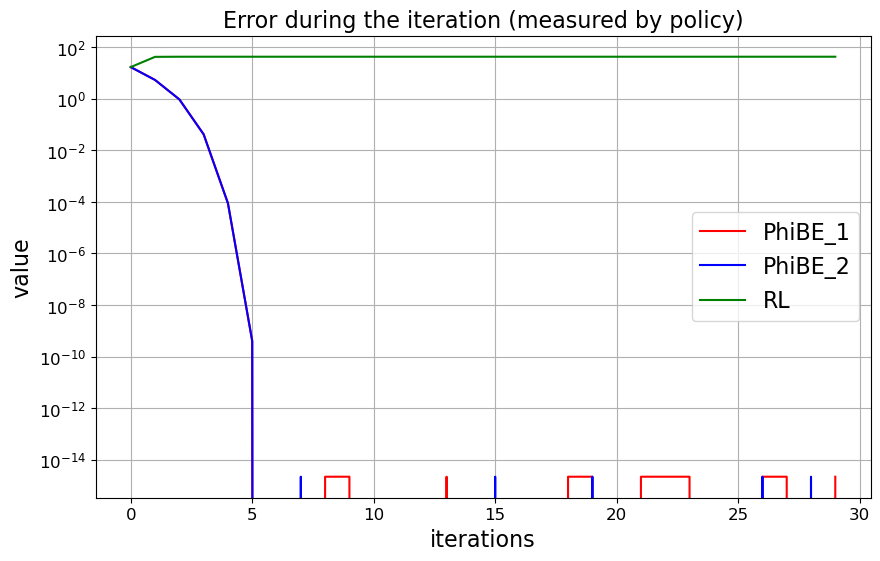

In [31]:
x_tensor = torch.arange(30)
w_tensor = torch.tensor(V_exact_dist_phibe_1[:30], dtype=torch.float64)
y_tensor = torch.tensor(V_exact_dist_phibe_2[:30], dtype=torch.float64)
v_tensor = torch.tensor(V_exact_dist_RL[:30], dtype=torch.float64)
x_values = x_tensor.numpy()
w_values = w_tensor.numpy()
y_values = y_tensor.numpy()
v_values = v_tensor.numpy()
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=12)  # Adjust 12 as needed
plt.yticks(fontsize=12)
plt.semilogy(x_values, w_values, label='PhiBE_1', color='red')
plt.semilogy(x_values, y_values, label='PhiBE_2', color='blue')
plt.semilogy(x_values, v_values, label='RL', color='green')
plt.title('Error during the iteration (measured by policy)', fontsize=16)
plt.xlabel('iterations', fontsize=16)
plt.ylabel('value', fontsize=16)
plt.grid(True)
plt.legend(fontsize=16)
plt.show()

In [32]:
A = 100
B = 1
sig = 0.
R = 1
Q = 1
S = 0
beta = 0
M = 2
info_true = {"A":A, "B":B, "sig":sig, "R":R, "Q":Q,}
true_b, True_V = LQR_1D_true_solution(A, B, Q, R, sig, beta)
print(true_b, True_V)

-200.00499987500626 tensor([   0.0000,    0.0000, -200.0050])


In [34]:
b_init = - 100.2
Q_init = torch.tensor([1., -1., -1., -1.]).to(device)
batch_size = int(1e6)
bd_low_s = -300
bd_upper_s = 300.
bd_low_b = -300.
bd_upper_b = 300.
bd_low_a = -300.
bd_upper_a = 300
bases_V = bases_poly_simp
d_bases_V = d_bases_poly_simp
sec_d_bases_V = sec_bases_poly_simp
bases_Q = bases_2d_simp
num_iter = 80
GD_num_iter = 80
I = 6
m = int(batch_size / I)
m_Q = int(batch_size / I)
lr = 0.01
dt = 0.01
order = 1
true_V = True_V
simp_basis = True
deterministic = True
b_val_phibe_1, V_exact_dist_phibe_1, V_func_phibe_1 = phibe_finder_1D_LQR(beta, b_init, Q_init, bd_low_s, bd_upper_s, bd_low_b, bd_upper_b, reward, simp_basis,
                                                                                     bases_V, d_bases_V, sec_d_bases_V, bases_Q, num_iter, deterministic, "Galerkin", GD_num_iter, m, m_Q, I, lr, dt, order, 
                                                                                     true_V, info_true)

Running Optimal Phibe of order 1 using Galerkin: 100%|██████████| 80/80 [00:03<00:00, 26.39it/s]


In [35]:
b_init = - 100.2
Q_init = torch.tensor([1., -1., -1., -1.]).to(device)
batch_size = int(1e6)
bd_low_s = -300
bd_upper_s = 300.
bd_low_b = -300.
bd_upper_b = 300.
bd_low_a = -300.
bd_upper_a = 300
bases_V = bases_poly_simp
d_bases_V = d_bases_poly_simp
sec_d_bases_V = sec_bases_poly_simp
bases_Q = bases_2d_simp
num_iter = 80
GD_num_iter = 80
I = 6
m = int(batch_size / I)
m_Q = int(batch_size / I)
lr = 0.01
dt = 0.01
order = 2
true_V = True_V
simp_basis = True
deterministic = True
b_val_phibe_2, V_exact_dist_phibe_2, V_func_phibe_2 = phibe_finder_1D_LQR(beta, b_init, Q_init, bd_low_s, bd_upper_s, bd_low_b, bd_upper_b, reward, simp_basis,
                                                                                     bases_V, d_bases_V, sec_d_bases_V, bases_Q, num_iter, deterministic, "Galerkin", GD_num_iter, m, m_Q, I, lr, dt, order, 
                                                                                     true_V, info_true)

Running Optimal Phibe of order 2 using Galerkin: 100%|██████████| 80/80 [00:02<00:00, 34.25it/s]


In [37]:
b_init = - 100.2
Q_init = torch.tensor([1., -1., -1., -1.]).to(device)
batch_size = int(1e6)
bd_low_s = -300
bd_upper_s = 300.
bd_low_a = -300.
bd_upper_a = 300
bases_Q = bases_2d_simp
num_iter = 80
GD_num_iter = 80
I = 6
m_Q = int(batch_size / I)
dt = 0.01
order = 1
true_V = True_V
simple_basis = True
b_val_RL, V_exact_dist_RL = RL_finder_1D_LQR(beta, b_init, bd_low_s, bd_upper_s, bd_low_a, bd_upper_a, reward, simple_basis, bases_Q, num_iter, m_Q, I, dt, true_V, info_true)

Running RL method: 100%|██████████| 80/80 [00:02<00:00, 28.69it/s]


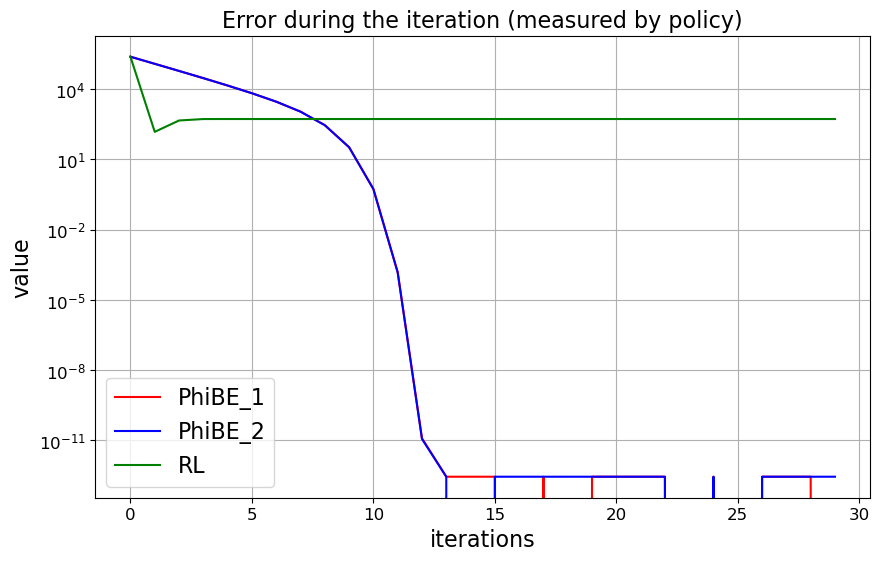

In [38]:
x_tensor = torch.arange(30)
w_tensor = torch.tensor(V_exact_dist_phibe_1[:30], dtype=torch.float64)
y_tensor = torch.tensor(V_exact_dist_phibe_2[:30], dtype=torch.float64)
v_tensor = torch.tensor(V_exact_dist_RL[:30], dtype=torch.float64)
x_values = x_tensor.numpy()
w_values = w_tensor.numpy()
y_values = y_tensor.numpy()
v_values = v_tensor.numpy()
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=12)  # Adjust 12 as needed
plt.yticks(fontsize=12)
plt.semilogy(x_values, w_values, label='PhiBE_1', color='red')
plt.semilogy(x_values, y_values, label='PhiBE_2', color='blue')
plt.semilogy(x_values, v_values, label='RL', color='green')
plt.title('Error during the iteration (measured by policy)', fontsize=16)
plt.xlabel('iterations', fontsize=16)
plt.ylabel('value', fontsize=16)
plt.grid(True)
plt.legend(fontsize=16)
plt.show()
